In [1]:
import sys
sys.path.insert(0,"../")
import Constants.SI as SI
import eBeam
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy.integrate import simps
c = SI.lightSpeed;
#% matplotlib notebook

In [2]:
# Beam parameters (Facet II)
gamma    = 20000; 
beta     = np.sqrt(1 - 1/gamma**2);
en       = 5.3e-6; # m-rad
beta_s = np.array([0.05, 0.1, 0.5, 1]) # m  
# Get beam width from en and betatron
sigma_r5 = eBeam.get_sigma_r(en, beta_s[0], gamma);
sigma_r1 = eBeam.get_sigma_r(en, beta_s[1], gamma);
sigma_z = 5.2e-6;
n_sigma_t = 5; # number of sigma_ts to calculate along
n_sigma_r = 30;
Q = 1.5e-9;
N = Q/SI.elemCharge
beamParams5 = [sigma_z, sigma_r5, beta, Q]
beamParams1 = [sigma_z, sigma_r1, beta, Q]
pPK5 = eBeam.peak_charge_dens(beamParams5)
pPK1 = eBeam.peak_charge_dens(beamParams1)
sigma_t = sigma_z / (beta * c)

In [3]:
# Ionization energies
Vi_Ar = 15.75962;
Vi_He = 24.58741;
Vi_Xe = 12.13;

In [4]:
# r and z arrays for computing the E field
npoints = 1000
r_start5 = -n_sigma_r * sigma_r5
r_end5   = -r_start5

r_start1 = -n_sigma_r * sigma_r1
r_end1   = -r_start1

r5 = np.linspace(r_start5, r_end5, npoints)
r1 = np.linspace(r_start1,r_end1, npoints)

t_start = (-sigma_t/2) * n_sigma_t
t_end   = -t_start
t = np.linspace(t_start , t_end, npoints)

z_arr = np.linspace(-2*sigma_z, 2*sigma_z,npoints)

pos_5 = [r5, t]
pos_1 = [r1, t]

pos_z5 = [r5,z_arr]
pos_z1 = [r1,z_arr]

In [5]:
Er5, rPeak5, EPeak5 = eBeam.rad_E_field(pos_5, beamParams5)
Er1, rPeak1, EPeak1 = eBeam.rad_E_field(pos_1, beamParams1)
W_Ar_5 = eBeam.ionization_rate(Er5, beamParams5, Vi_Ar)
W_Ar_1 = eBeam.ionization_rate(Er1, beamParams1, Vi_Ar)

W_He_5 = eBeam.ionization_rate(Er5, beamParams5, Vi_He)
W_He_1 = eBeam.ionization_rate(Er1, beamParams1, Vi_He)

n_Ar_5 = eBeam.plasmaDens(W_Ar_5, t, sigma_t)
n_Ar_1 = eBeam.plasmaDens(W_Ar_1, t, sigma_t)

n_He_5 = eBeam.plasmaDens(W_He_5, t, sigma_t)
n_He_1 = eBeam.plasmaDens(W_He_1, t, sigma_t)

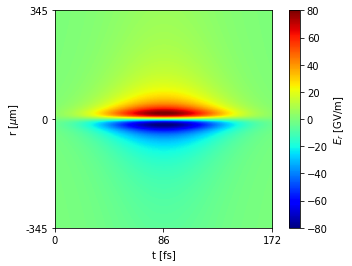

In [6]:
eBeam.plot_field_rt(np.flipud(Er5), [np.flipud(r5), t], '$E_r$ [GV/m]', [-80, 80])

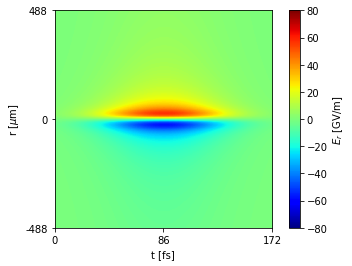

In [7]:
eBeam.plot_field_rt(np.flipud(Er1), [np.flipud(r1), t], '$E_r$ [GV/m]', [-80, 80])

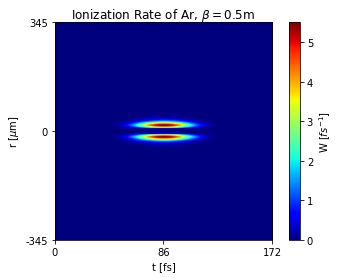

In [8]:
eBeam.plot_field_rt(W_Ar_5, [np.flipud(r5), t],'W [$fs^{-1}$]', \
                    [0, 5.5], gas = True, gasName = 'Ar, ' + r'$\beta = $' + str(beta_s[0]) + 'm')

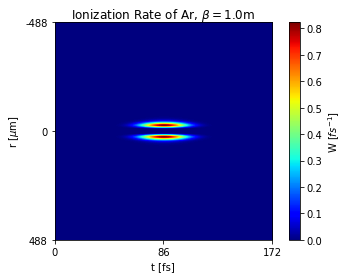

In [9]:
eBeam.plot_field_rt(W_Ar_1, pos_1,'W [$fs^{-1}$]', \
                     gas = True, gasName = 'Ar, ' + r'$\beta = $' + str(beta_s[1]) + 'm')

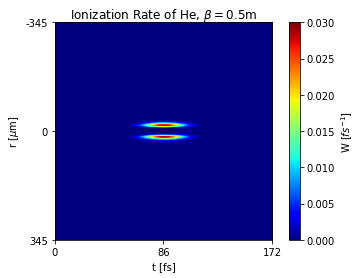

In [10]:
eBeam.plot_field_rt(W_He_5, pos_5, 'W [$fs^{-1}$]', \
                    [0, 0.03], gas = True, gasName = 'He, ' + r'$\beta = $' + str(beta_s[0]) + 'm')

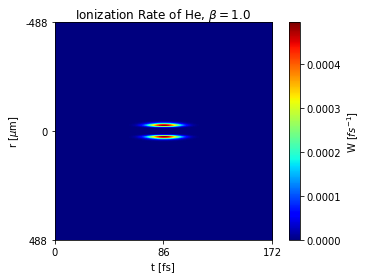

In [11]:
eBeam.plot_field_rt(W_He_1, pos_1, 'W [$fs^{-1}$]',\
                    [], gas = True, gasName = 'He, ' + r'$\beta = $' + str(beta_s[1]))

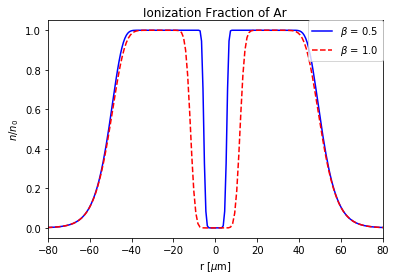

In [12]:
eBeam.plot_plasma([r5, r1], [n_Ar_5, n_Ar_1], [-80, 80], 'Ar', beta_s)

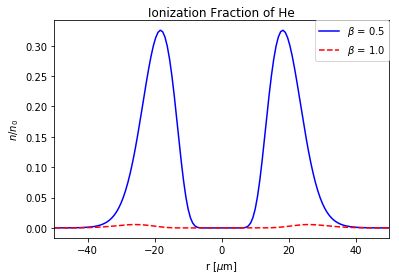

In [13]:
eBeam.plot_plasma([r5, r1], [n_He_5, n_He_1], [-50, 50],'He', beta_s)

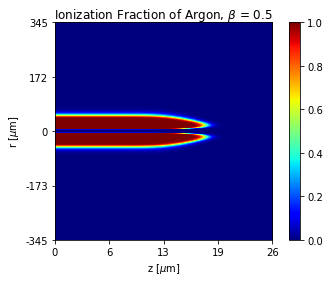

In [14]:
n_rz_Ar_1 = eBeam.plot_2D_plasma(np.flipud(W_Ar_5), np.flipud(r5), t, [0,1], \
                               'Ionization Fraction of Argon, $\\beta$ = ' + str(beta_s[0])) 

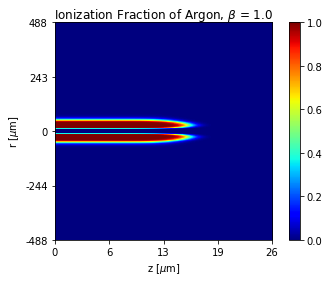

In [15]:
n_rz_Ar_1 = eBeam.plot_2D_plasma(np.flipud(W_Ar_1), np.flipud(r1), t,[0,1], \
                               'Ionization Fraction of Argon, $\\beta$ = ' + str(beta_s[1])) 

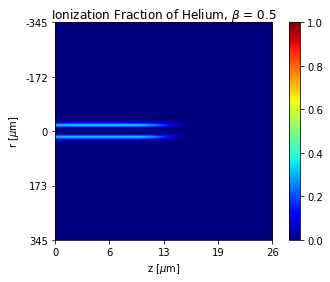

In [16]:
n_rz_He_5 = eBeam.plot_2D_plasma(W_He_5, r5, t, [0,1], 'Ionization Fraction of Helium, $\\beta$ = ' + str(beta_s[0]))

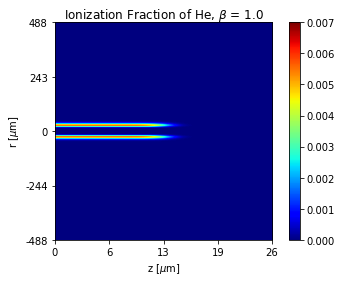

In [17]:
n_rz_Ar_1 = eBeam.plot_2D_plasma(np.flipud(W_He_1), np.flipud(r1), t, [0,.007], \
                               'Ionization Fraction of He, $\\beta$ = ' + str(beta_s[1])) 

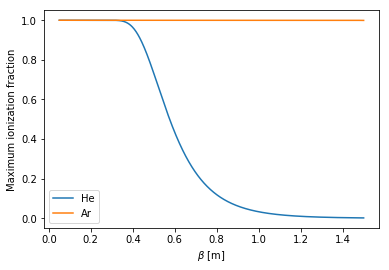

In [27]:
beta_arr = np.linspace(.05, 1.5, 1000)
max_ion_He = eBeam.maxIonization(beta_arr, sigma_z, gamma, en, Q, Vi_He)
max_ion_Ar = eBeam.maxIonization(beta_arr, sigma_z, gamma, en, Q, Vi_Ar)
plt.plot(beta_arr, max_ion_He, label = 'He')
plt.plot(beta_arr, max_ion_Ar, label = 'Ar')
plt.xlabel('$\\beta$ [m]')
plt.ylabel('Maximum ionization fraction')
plt.legend()
plt.show()